In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Connected graph

Graph connectivity depends on whenever the graph is directed or not. An undirected graph is connected if, for every path of nodes, there is a connection between them.

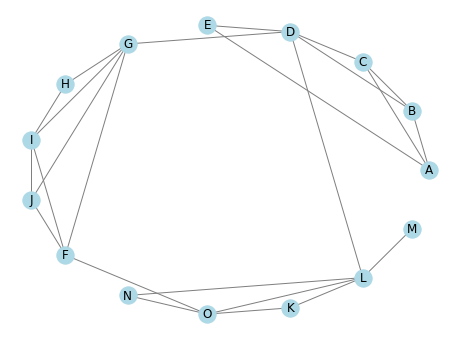

In [2]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'A'),
                 ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'F'), ('F', 'G'), ('I', 'F'), ('J', 'G'), ('I', 'G'), 
                 ('N', 'O'), ('O', 'K'), ('K', 'L'), ('L', 'M'), ('L', 'M'), ('L', 'O'), ('L', 'N'),
                 ('G', 'D'), ('F', 'O'), ('L', 'D')])

pos = nx.shell_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

In [3]:
nx.is_connected(G)

True

# Connected components

Connected component is a subset of nodes such that:
- every node in the subset has a path to every other node
- no other node has a path to any node in the subset

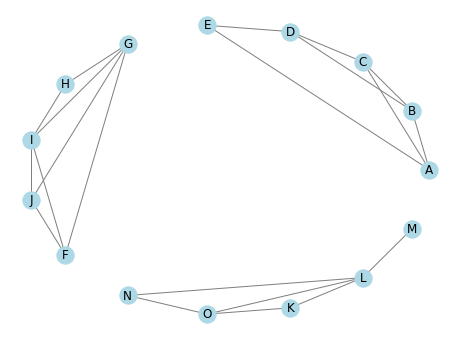

In [4]:
G.remove_edges_from([('G', 'D'), ('F', 'O'), ('L', 'D')])

pos = nx.shell_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

In [5]:
nx.is_connected(G)

False

As we can see, there are three connected components in the graph. We can use networkx to show us what nodes they consist of

In [6]:
nx.number_connected_components(G)

3

In [7]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [8]:
nx.node_connected_component(G, 'M')

{'K', 'L', 'M', 'N', 'O'}

# Connectivity in directed graphs

On the other hand, a directed graph is strongly connected if, for every pair of nodes u and v, there is a directed path from u to v and a directed path from v to u.

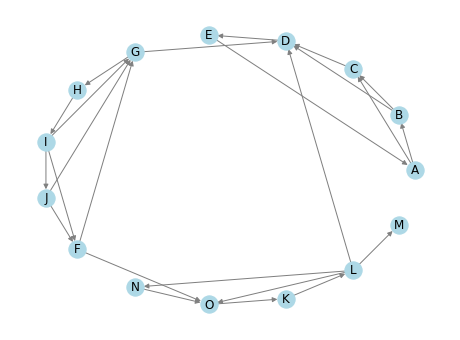

In [9]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'A'),
                 ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'F'), ('F', 'G'), ('I', 'F'), ('J', 'G'), ('I', 'G'), 
                 ('N', 'O'), ('O', 'K'), ('K', 'L'), ('L', 'M'), ('L', 'M'), ('L', 'O'), ('L', 'N'),
                 ('G', 'D'), ('F', 'O'), ('L', 'D')])

pos = nx.shell_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

Our graph is not strongly connected, because there is no directed path from some of the nodes to the rest of the nodes

In [10]:
nx.is_strongly_connected(G)

False

A directed graph is weakly connected, if replacing all directed edges with undirected edges produces a connected graph

In [11]:
nx.is_weakly_connected(G)

True

# Connected components in directed graphs

Strongly connected components is a subset of nodes such that:
- every node in the subset has a directed path to all other node
- no other node has a directed path to and from every node in the subset

We can check what are the strongly connected components in the graph above

In [12]:
sorted(nx.strongly_connected_components(G))

[{'A', 'B', 'C', 'D', 'E'},
 {'M'},
 {'K', 'L', 'N', 'O'},
 {'F', 'G', 'H', 'I', 'J'}]

Weakly connected components: the connected components in the graph after replacing all directed edges with undirected edges. In the case of the graph above, all nodes form a single connected component

In [13]:
sorted(nx.weakly_connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]